# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import geopandas as gpd

In [2]:
plt.style.use('ggplot')

Let's begin our exploration. We'll start by looking at the green spaces dataset.

Note that the green spaces dataset has been taken from https://open.toronto.ca/dataset/green-spaces/

In [3]:
green_spaces = gpd.read_file("green-spaces.geojson")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [4]:
# Display dataset info
green_spaces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   _id              3309 non-null   int64   
 1   AREA_ID          3309 non-null   int64   
 2   AREA_ATTR_ID     3309 non-null   int64   
 3   PARENT_AREA_ID   3309 non-null   int64   
 4   AREA_CLASS_ID    3309 non-null   float64 
 5   AREA_CLASS       3309 non-null   object  
 6   AREA_SHORT_CODE  3309 non-null   object  
 7   AREA_LONG_CODE   3309 non-null   object  
 8   AREA_NAME        3309 non-null   object  
 9   AREA_DESC        3309 non-null   object  
 10  OBJECTID         3309 non-null   float64 
 11  geometry         3309 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(5)
memory usage: 310.3+ KB


In [5]:
# Display the first few rows
green_spaces.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,1,1,0,890.0,OTHER_CEMETERY,None,4009,ARMADALE FREE METHODIST CEMETERY,ARMADALE FREE METHODIST CEMETERY,1.0,"MULTIPOLYGON (((-79.25752 43.82953, -79.25739 ..."
1,2,2,2,0,890.0,OTHER_CEMETERY,None,4010,HILLSIDE CEMETERY,HILLSIDE CEMETERY,2.0,"MULTIPOLYGON (((-79.18962 43.82488, -79.18949 ..."
2,3,3,3,0,890.0,OTHER_CEMETERY,None,4011,HIGHLAND MEMORY GARDENS,HIGHLAND MEMORY GARDENS,3.0,"MULTIPOLYGON (((-79.34758 43.80810, -79.34758 ..."
3,4,4,4,0,890.0,OTHER_CEMETERY,None,4005,CHRISTIE'S METHODIST CEMETERY,CHRISTIE'S METHODIST CEMETERY,4.0,"MULTIPOLYGON (((-79.31835 43.79902, -79.31851 ..."
4,5,5,5,0,890.0,OTHER_CEMETERY,None,4012,ST. PAUL'S ANGLICAN CHURCH CEMETERY,ST. PAUL'S ANGLICAN CHURCH CEMETERY,5.0,"MULTIPOLYGON (((-79.31649 43.79640, -79.31650 ..."


In [6]:
green_spaces['geometry'].geom_type.unique()

array(['MultiPolygon'], dtype=object)

In [7]:
green_spaces['geometry'].is_valid.value_counts()

True     3308
False       1
Name: count, dtype: int64

We can see that almost all geometries are valid, except for one invalid geometry.

<Axes: >

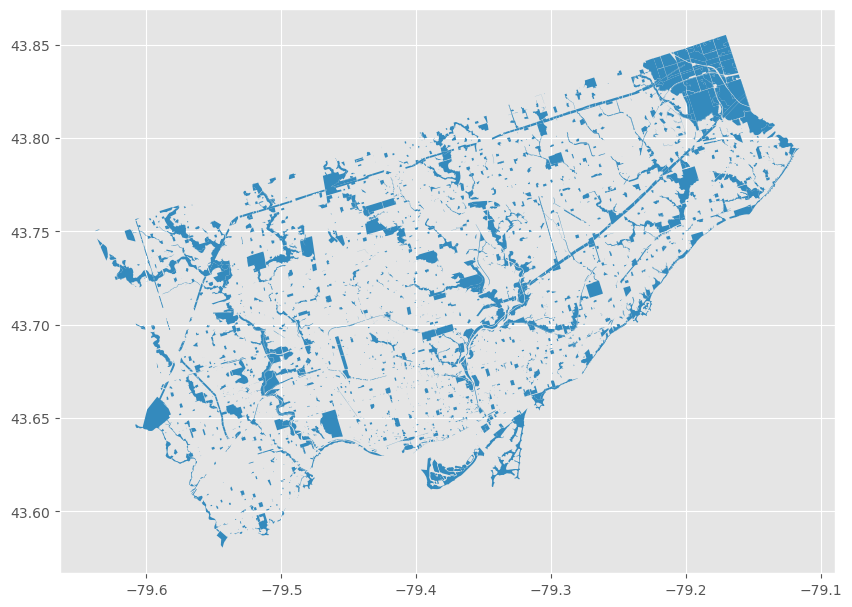

In [8]:
green_spaces.plot(figsize=(10, 10))

In [9]:
invalid_rows = green_spaces[~green_spaces['geometry'].is_valid]
invalid_rows

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
2695,2696,40230,312,0,802.0,Park,312,312,EAST DON PARKLAND,None,4330132.0,"MULTIPOLYGON (((-79.37325 43.78777, -79.37327 ..."


Let's drop this invalid row, since dropping 1 row will not significantly affect the dataset.

In [10]:
# Drop invalid geometries
green_spaces = green_spaces[green_spaces['geometry'].is_valid]

# Check if it is now valid
green_spaces['geometry'].is_valid.value_counts()

True    3308
Name: count, dtype: int64

In [11]:
# Count occurrences of each AREA_CLASS
green_spaces['AREA_CLASS'].value_counts()

AREA_CLASS
Park                            1606
OTHER_CITY                       678
OTHER_HYDRO                      251
Building Grounds                 161
OTHER_ROAD                       138
OTHER_PROVINCIAL_FEDERAL         118
OTHER_TRCA                       114
Traffic Island                    80
OTHER_CEMETERY                    64
Cul de Sac                        26
Open Green Space                  23
OTHER_GOLFCOURSE                  20
Civic Centre Square                6
Boulevard                          6
Golf Course                        5
Cemetery                           5
Hydro Field/Utility Corridor       3
Orphaned Space                     3
OTHER_UNKNOWN                      1
Name: count, dtype: int64

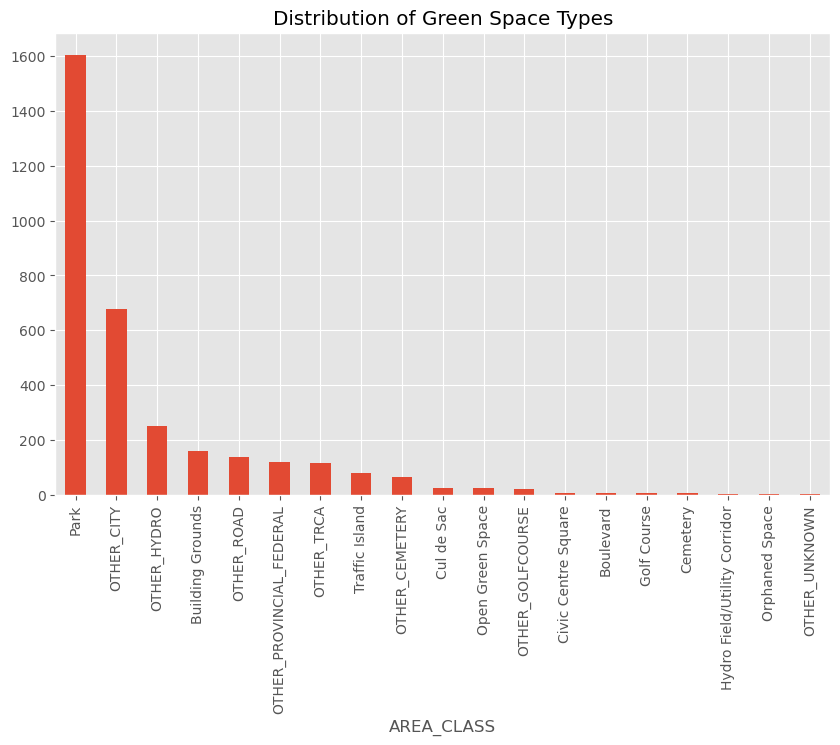

In [12]:
# Plot a bar chart for AREA_CLASS distribution
green_spaces['AREA_CLASS'].value_counts().plot(kind='bar', figsize=(10, 6), title="Distribution of Green Space Types")
plt.show()

We can see that 'Park' is the most dominant class, let's visualize what this looks like.

<Axes: >

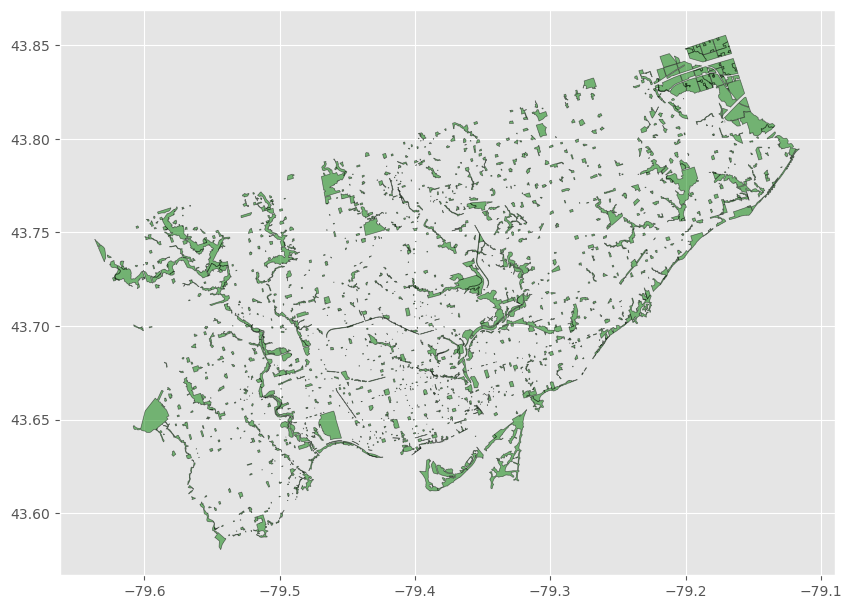

In [13]:
# Plot parks
parks = green_spaces[green_spaces['AREA_CLASS'] == 'Park']
parks.plot(figsize=(10, 10), color="green", alpha=0.5, edgecolor="black")

The data visaulisation for parks looks amazing!

Let's try cross-referencing this green space data with housing data and its prices. The following 2 files that include files for toronto neighbourhood centers with coordinates and census data is from the following repository: https://github.com/tyedem/Toronto-Real-Estate-Analysis/tree/main/Data

In [14]:
# Load the datasets
coordinates_df = pd.read_csv("toronto_neighbourhoods_coordinates.csv")
census_data_df = pd.read_csv("toronto_neighbourhoods_census_data.csv")

In [15]:
coordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  140 non-null    object 
 1   lat            140 non-null    float64
 2   lon            140 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


In [16]:
coordinates_df.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [17]:
census_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year                         560 non-null    int64 
 1   neighbourhood                560 non-null    object
 2   single_detached_house        560 non-null    int64 
 3   apartment_five_storeys_plus  560 non-null    int64 
 4   movable_dwelling             560 non-null    int64 
 5   semi_detached_house          560 non-null    int64 
 6   row_house                    560 non-null    int64 
 7   duplex                       560 non-null    int64 
 8   apartment_five_storeys_less  560 non-null    int64 
 9   other_house                  560 non-null    int64 
 10  average_house_value          560 non-null    int64 
 11  shelter_costs_owned          560 non-null    int64 
 12  shelter_costs_rented         560 non-null    int64 
dtypes: int64(12), object(1)
memory usag

In [18]:
census_data_df.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [19]:
# Merge datasets on 'neighbourhood'
merged_df = pd.merge(census_data_df, coordinates_df, on='neighbourhood')

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         560 non-null    int64  
 1   neighbourhood                560 non-null    object 
 2   single_detached_house        560 non-null    int64  
 3   apartment_five_storeys_plus  560 non-null    int64  
 4   movable_dwelling             560 non-null    int64  
 5   semi_detached_house          560 non-null    int64  
 6   row_house                    560 non-null    int64  
 7   duplex                       560 non-null    int64  
 8   apartment_five_storeys_less  560 non-null    int64  
 9   other_house                  560 non-null    int64  
 10  average_house_value          560 non-null    int64  
 11  shelter_costs_owned          560 non-null    int64  
 12  shelter_costs_rented         560 non-null    int64  
 13  lat                 

In [21]:
merged_df.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,lat,lon
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870,43.805441,-79.266712
1,2006,Agincourt North,3295,2060,0,775,1425,600,565,0,293140,1055,886,43.805441,-79.266712
2,2011,Agincourt North,3385,2130,5,820,1465,610,705,20,366667,1160,976,43.805441,-79.266712
3,2016,Agincourt North,3345,2120,5,805,1440,645,735,15,459051,1411,1202,43.805441,-79.266712
4,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892,43.788658,-79.265612


In [22]:
# Convert to GeoDataFrame
merged_df['geometry'] = gpd.points_from_xy(merged_df['lon'], merged_df['lat'])
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry', crs="EPSG:4326")

In [23]:
merged_gdf.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,lat,lon,geometry
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870,43.805441,-79.266712,POINT (-79.26671 43.80544)
1,2006,Agincourt North,3295,2060,0,775,1425,600,565,0,293140,1055,886,43.805441,-79.266712,POINT (-79.26671 43.80544)
2,2011,Agincourt North,3385,2130,5,820,1465,610,705,20,366667,1160,976,43.805441,-79.266712,POINT (-79.26671 43.80544)
3,2016,Agincourt North,3345,2120,5,805,1440,645,735,15,459051,1411,1202,43.805441,-79.266712,POINT (-79.26671 43.80544)
4,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892,43.788658,-79.265612,POINT (-79.26561 43.78866)


In [24]:
# Group average price per year
avg_price_by_year = merged_df.groupby('year')['average_house_value'].mean()
avg_price_by_year

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

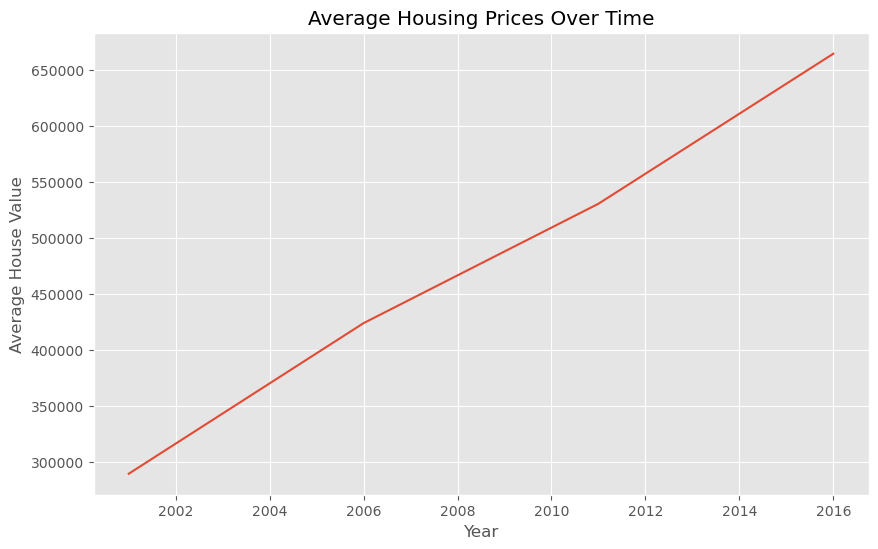

In [25]:
avg_price_by_year.plot(kind='line', figsize=(10, 6), title="Average Housing Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Average House Value")
plt.show()

/tmp/ipykernel_90/4054451529.py:4: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


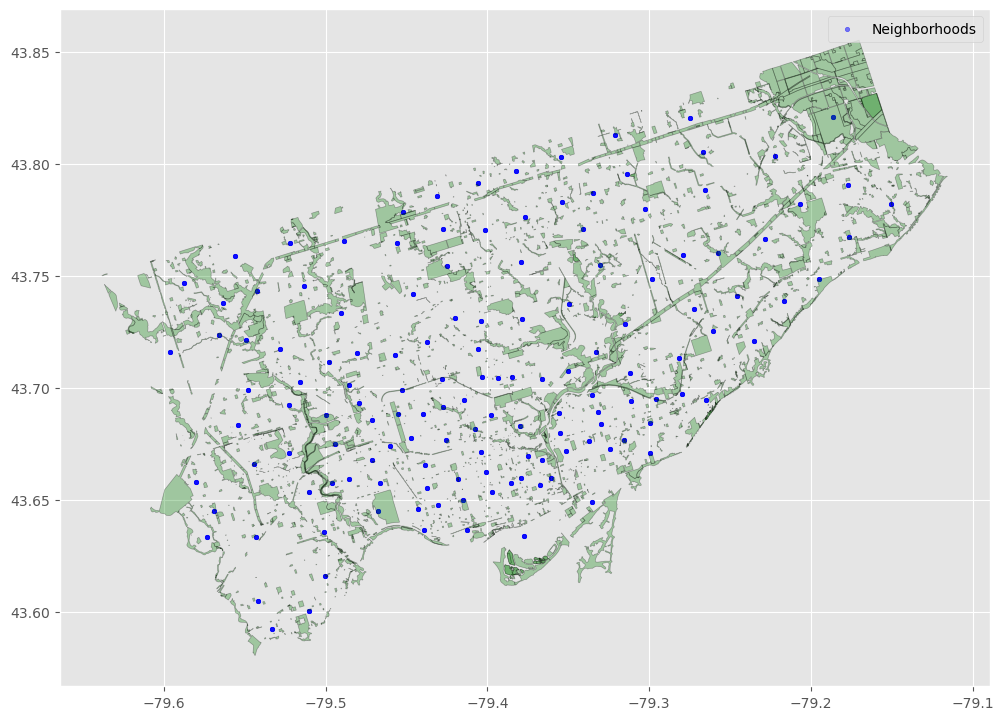

In [26]:
# Plot neighborhoods
ax = merged_gdf.plot(figsize=(12, 12), color='blue', alpha=0.5, markersize=10, label="Neighborhoods")
green_spaces.plot(ax=ax, color='green', alpha=0.3, edgecolor='black', label="Green Spaces")
plt.legend()
plt.show()

Let's perform proximity analysis and calculate the distance between each neighbourhood and the nearest green space.

In [27]:
# Calculate dist. to nearest green space
merged_gdf['distance_to_nearest_green_space'] = merged_gdf.geometry.apply(
    lambda x: green_spaces.geometry.distance(x).min()
)

# View these distances neighbourhood-wise
merged_gdf[['neighbourhood', 'distance_to_nearest_green_space', 'average_house_value']].head()

/tmp/ipykernel_90/192664342.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambda x: green_spaces.geometry.distance(x).min()


,neighbourhood,distance_to_nearest_green_space,average_house_value
0,Agincourt North,0.000645,200388
1,Agincourt North,0.000645,293140
2,Agincourt North,0.000645,366667
3,Agincourt North,0.000645,459051
4,Agincourt South-Malvern West,0.002119,203047


In [28]:
# Reproject (UTM zone for Toronto)
merged_gdf = merged_gdf.to_crs(epsg=32617)  # UTM Zone 17N
green_spaces = green_spaces.to_crs(epsg=32617)

# Recalculate distances with the projected CRS
merged_gdf['distance_to_nearest_green_space'] = merged_gdf.geometry.apply(
    lambda x: green_spaces.geometry.distance(x).min()
)

# Check the updated distances
merged_gdf[['neighbourhood', 'distance_to_nearest_green_space', 'average_house_value']].head()

,neighbourhood,distance_to_nearest_green_space,average_house_value
0,Agincourt North,71.500430,200388
1,Agincourt North,71.500430,293140
2,Agincourt North,71.500430,366667
3,Agincourt North,71.500430,459051
4,Agincourt South-Malvern West,220.713903,203047


In [29]:
# Calculate the correlation
correlation = merged_gdf['distance_to_nearest_green_space'].corr(merged_gdf['average_house_value'])
print(f"Correlation between distance to green spaces and house prices: {correlation}")

Correlation between distance to green spaces and house prices: 0.06173170907317185


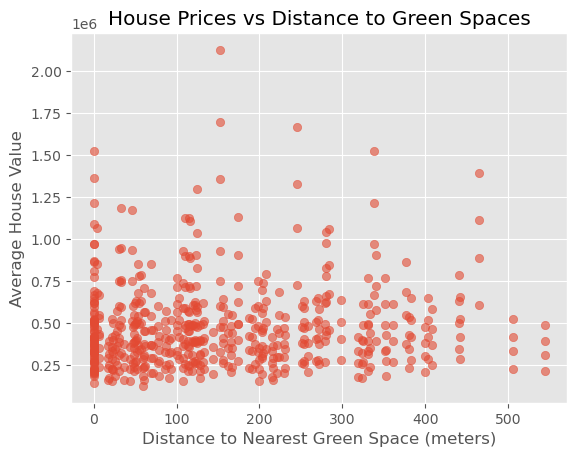

In [30]:
plt.style.use('ggplot')
# Scatter plot
plt.scatter(
    merged_gdf['distance_to_nearest_green_space'],
    merged_gdf['average_house_value'],
    alpha=0.6
)
plt.title("House Prices vs Distance to Green Spaces")
plt.xlabel("Distance to Nearest Green Space (meters)")
plt.ylabel("Average House Value")
plt.savefig('plots/prices_vs_dist_green_spaces.png', dpi=300)
plt.show()

# Using Web-scrapped data based on Wards

In [31]:
neighborhood_prices = pd.read_csv('neighborhood-prices.csv')

In [32]:
neighborhood_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Ward                                    3510 non-null   object 
 1   Composite Index                         3504 non-null   float64
 2   Composite Benchmark                     3504 non-null   object 
 3   Composite Yr./Yr. Change%               3504 non-null   object 
 4   Single-Family Detached Index            3282 non-null   float64
 5   Single-Family Detached Benchmark        3282 non-null   object 
 6   Single-Family Detached Yr./Yr. Change%  3282 non-null   object 
 7   Single-Family Attached Index            3282 non-null   float64
 8   Single-Family Attached Benchmark        3282 non-null   object 
 9   Single-Family Attached Yr./Yr. Change%  3282 non-null   object 
 10  Townhouse Index                         3282 non-null   obje

In [33]:
neighborhood_prices.head()

,Ward,Composite Index,Composite Benchmark,Composite Yr./Yr. Change%,Single-Family Detached Index,Single-Family Detached Benchmark,Single-Family Detached Yr./Yr. Change%,Single-Family Attached Index,Single-Family Attached Benchmark,Single-Family Attached Yr./Yr. Change%,Townhouse Index,Townhouse Benchmark,Townhouse Yr./Yr. Change%,Apartment Index,Apartment Benchmark,Apartment Yr./Yr. Change%,Year,Month,Date/Time
0,Toronto C04,250.0,"$1,542,800",1.21%,253.9,"$1,788,900",1.36%,250.4,"$1,172,300",-0.71%,0.0,$0,-100.00%,232.9,"$538,700",2.55%,2019,February,2019-02-01
1,Toronto C06,269.3,"$1,048,700",-0.63%,249.1,"$1,064,000",-6.00%,210.6,"$779,100",-6.98%,245.4,"$658,200",6.00%,290.0,"$641,300",3.42%,2019,February,2019-02-01
2,Toronto C07,255.4,"$883,600",1.19%,279.2,"$1,277,200",-5.80%,201.8,"$722,100",-5.70%,242.7,"$684,100",5.71%,246.0,"$600,700",7.05%,2019,February,2019-02-01
3,Toronto C08,275.2,"$719,600",10.39%,277.8,"$1,620,800",11.52%,276.5,"$1,319,000",12.54%,301.4,"$779,400",15.75%,274.1,"$592,500",10.08%,2019,February,2019-02-01
4,Toronto C09,180.0,"$1,274,100",3.93%,129.8,"$1,630,500",-6.21%,145.0,"$1,179,900",-4.35%,287.4,"$1,574,100",3.79%,206.0,"$682,500",6.96%,2019,February,2019-02-01


We will first map our wards, and proceed our analysis by overlaying different datasets on top of our wards and performing spatial analysis.

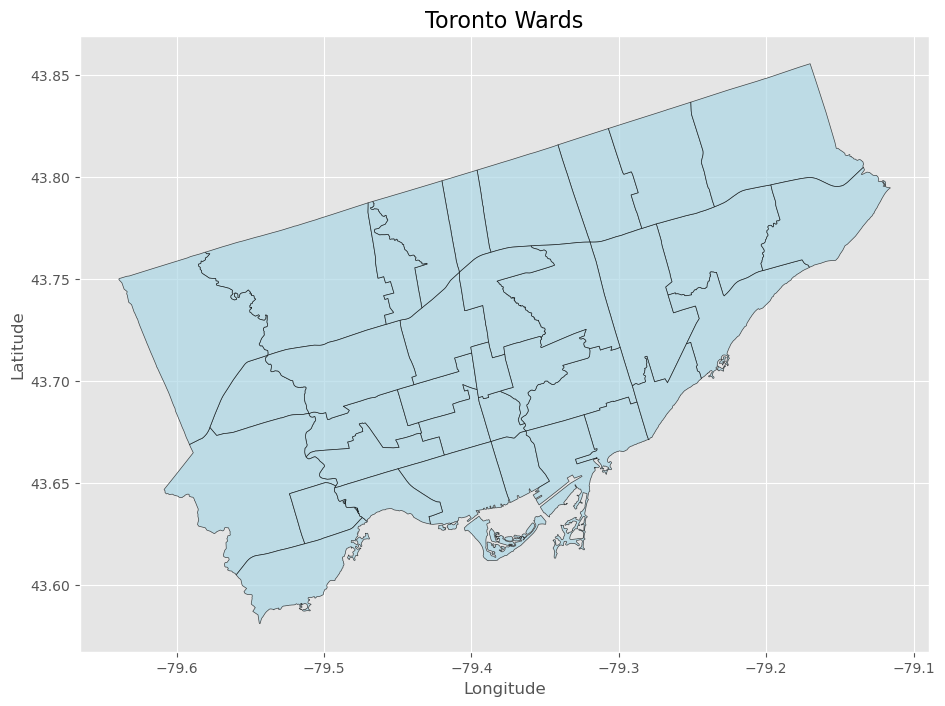

In [34]:
import json
from shapely.geometry import shape

# Load the JSON file
with open("muni.json", "r") as f:
    data = json.load(f)

# Convert the JSON data into a GeoDataFrame
features = []
for item in data:
    geometry = shape(item["geometry"])
    ward_code = item["code"]  # Adjust key based on actual JSON structure
    features.append({"ward_code": ward_code, "geometry": geometry})

wards_gdf = gpd.GeoDataFrame(features, crs="EPSG:4326")

# Visualize the wards
wards_gdf.plot(figsize=(12, 8), color="lightblue", edgecolor="black", alpha=0.7)
plt.title("Toronto Wards", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

Let's use a uniform CRS to use the same map for different datasets.

In [35]:
green_spaces.crs

<Projected CRS: EPSG:32617>
Name: WGS 84 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°W and 78°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Ecuador - north of equator. Canada - Nunavut; Ontario; Quebec. Cayman Islands. Colombia. Costa Rica. Cuba. Jamaica. Nicaragua. Panama. United States (USA).
- bounds: (-84.0, 0.0, -78.0, 84.0)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
wards_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
wards_gdf = wards_gdf.to_crs(green_spaces.crs)
wards_gdf.crs

<Projected CRS: EPSG:32617>
Name: WGS 84 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°W and 78°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Ecuador - north of equator. Canada - Nunavut; Ontario; Quebec. Cayman Islands. Colombia. Costa Rica. Cuba. Jamaica. Nicaragua. Panama. United States (USA).
- bounds: (-84.0, 0.0, -78.0, 84.0)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

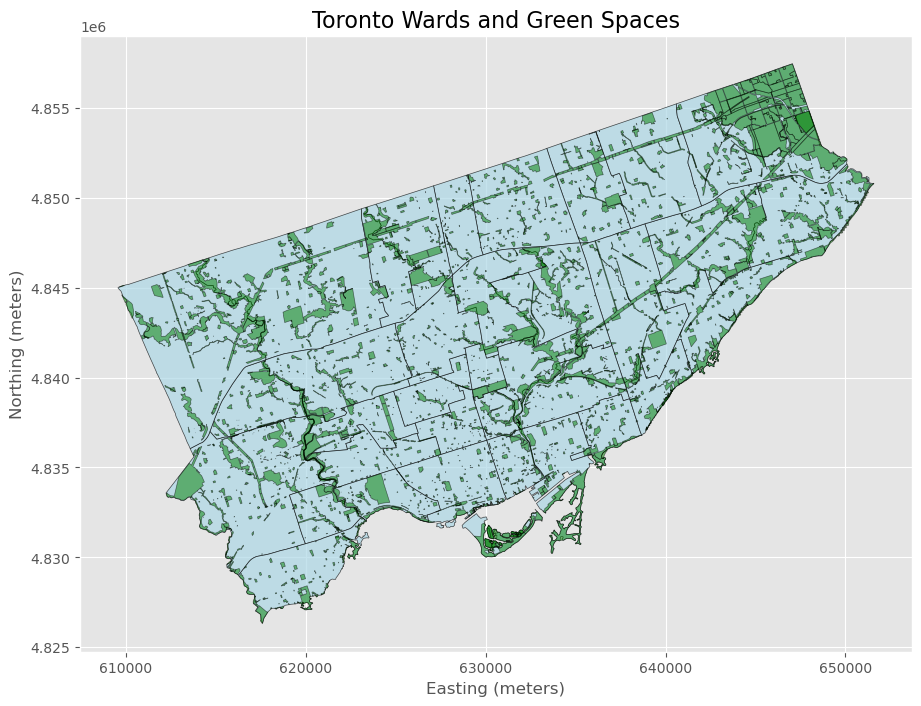

In [38]:
# Plot wards
ax = wards_gdf.plot(
    figsize=(12, 8),
    color="lightblue",
    edgecolor="black",
    alpha=0.7,
    label="Wards"
)

# Overlay green spaces
green_spaces.plot(
    ax=ax,
    color="green",
    edgecolor="black",
    alpha=0.5,
    label="Green Spaces"
)

# Add title and labels
plt.title("Toronto Wards and Green Spaces", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.savefig('plots/green_spaces_wards.png', dpi=300)
plt.show()

In [39]:
# Calculate intersections
intersections = gpd.overlay(wards_gdf, green_spaces, how="intersection")

# Calculate the area of each intersected geometry (green space within a ward)
intersections["green_space_area"] = intersections.geometry.area

# Aggregate the green space area by ward
green_space_per_ward = intersections.groupby("ward_code")["green_space_area"].sum().reset_index()

# Add total area for each ward
wards_gdf["total_area"] = wards_gdf.geometry.area

# Merge the green space data back into the ward GeoDataFrame
wards_gdf = wards_gdf.merge(green_space_per_ward, on="ward_code", how="left")

# Calculate the percentage of green space for each ward
wards_gdf["green_space_percentage"] = (wards_gdf["green_space_area"] / wards_gdf["total_area"]) * 100

# Fill NaN values with 0 (for wards without green spaces)
wards_gdf["green_space_percentage"] = wards_gdf["green_space_percentage"].fillna(0)

# Preview the updated GeoDataFrame
print(wards_gdf[["ward_code", "green_space_area", "total_area", "green_space_percentage"]].head())

  ward_code  green_space_area    total_area  green_space_percentage
0    01.E09      5.960914e+06  2.524593e+07               23.611389
1    01.E05      2.547552e+06  1.725923e+07               14.760523
2    01.W03      2.686456e+06  1.158621e+07               23.186662
3    01.C15      2.187981e+06  2.467911e+07                8.865721
4    01.C03      5.258504e+05  8.418490e+06                6.246374


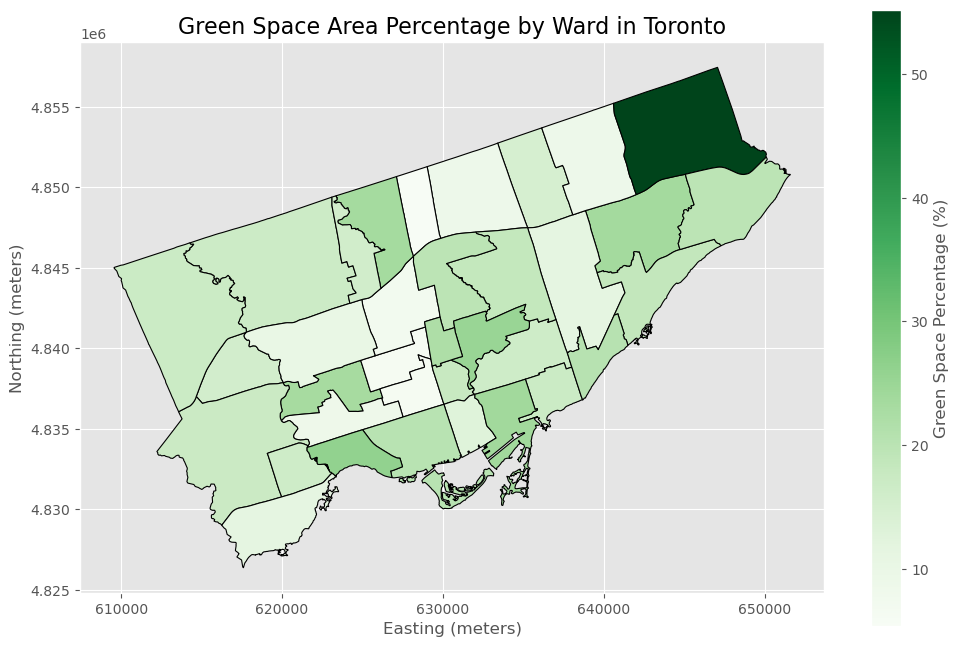

In [40]:
# Plot choropleth map for green space percentage
fig, ax = plt.subplots(figsize=(12, 8))
wards_gdf.plot(
    column="green_space_percentage",  # Use the green space percentage column
    cmap="Greens",  # Color scheme
    linewidth=0.8,  # Line width for ward boundaries
    edgecolor="black",  # Edge color for ward boundaries
    legend=True,  # Add legend
    legend_kwds={"label": "Green Space Percentage (%)"},
    ax=ax,  # Axis to plot on
)
plt.title("Green Space Area Percentage by Ward in Toronto", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.savefig('plots/choropleth_map_green_spaces.png', dpi=300)
plt.show()

In [41]:
# Clean up the neighborhood_prices dataset
neighborhood_prices_cleaned = neighborhood_prices[["Ward", "Composite Benchmark"]].copy()
neighborhood_prices_cleaned["Composite Benchmark"] = (
    neighborhood_prices_cleaned["Composite Benchmark"]
    .str.replace(",", "")
    .str.replace("$", "")
    .astype(float)
)

In [42]:
wards_gdf.head()

,ward_code,geometry,total_area,green_space_area,green_space_percentage
0,01.E09,"MULTIPOLYGON (((645600.076 4848907.460, 645518...",2.524593e+07,5.960914e+06,23.611389
1,01.E05,"MULTIPOLYGON (((636989.513 4851252.002, 637023...",1.725923e+07,2.547552e+06,14.760523
2,01.W03,"MULTIPOLYGON (((625388.986 4837639.006, 625423...",1.158621e+07,2.686456e+06,23.186662
3,01.C15,"MULTIPOLYGON (((630166.012 4846916.006, 629851...",2.467911e+07,2.187981e+06,8.865721
4,01.C03,"MULTIPOLYGON (((629198.987 4839613.005, 629214...",8.418490e+06,5.258504e+05,6.246374


In [43]:
wards_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ward_code               35 non-null     object  
 1   geometry                35 non-null     geometry
 2   total_area              35 non-null     float64 
 3   green_space_area        35 non-null     float64 
 4   green_space_percentage  35 non-null     float64 
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.5+ KB


In [44]:
wards_gdf["ward_code"].unique()

array(['01.E09', '01.E05', '01.W03', '01.C15', '01.C03', '01.C02',
       '01.C14', '01.E04', '01.W02', '01.E08', '01.E03', '01.W05',
       '01.C13', '01.W09', '01.C09', '01.C08', '01.W08', '01.C04',
       '01.C12', '01.E02', '01.W04', '01.C07', '01.C11', '01.W07',
       '01.E01', '01.W10', '01.W06', '01.C10', '01.C06', '01.C01',
       '01.W01', '01.E07', '01.E11', '01.E10', '01.E06'], dtype=object)

In [45]:
neighborhood_prices_cleaned.head()

,Ward,Composite Benchmark
0,Toronto C04,1542800.0
1,Toronto C06,1048700.0
2,Toronto C07,883600.0
3,Toronto C08,719600.0
4,Toronto C09,1274100.0


In [46]:
neighborhood_prices_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ward                 3510 non-null   object 
 1   Composite Benchmark  3504 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.0+ KB


We need to make sure the wards are consistent amongst the wards dataset and neighbourhood prices web-scrapped dataset.

In [47]:
wards_gdf["ward_code"] = wards_gdf["ward_code"].str.replace("01.", "Toronto ", regex=False)

In [48]:
print(wards_gdf["ward_code"].unique())
print(neighborhood_prices_cleaned["Ward"].unique())

['Toronto E09' 'Toronto E05' 'Toronto W03' 'Toronto C15' 'Toronto C03'
 'Toronto C02' 'Toronto C14' 'Toronto E04' 'Toronto W02' 'Toronto E08'
 'Toronto E03' 'Toronto W05' 'Toronto C13' 'Toronto W09' 'Toronto C09'
 'Toronto C08' 'Toronto W08' 'Toronto C04' 'Toronto C12' 'Toronto E02'
 'Toronto W04' 'Toronto C07' 'Toronto C11' 'Toronto W07' 'Toronto E01'
 'Toronto W10' 'Toronto W06' 'Toronto C10' 'Toronto C06' 'Toronto C01'
 'Toronto W01' 'Toronto E07' 'Toronto E11' 'Toronto E10' 'Toronto E06']
['Toronto C04' 'Toronto C06' 'Toronto C07' 'Toronto C08' 'Toronto C09'
 'Toronto C10' 'Toronto C11' 'Toronto C12' 'Toronto C13' 'Toronto C14'
 'Toronto C15' 'Toronto E01' 'Toronto E02' 'Toronto E03' 'Toronto E04'
 'Toronto E05' 'Toronto E06' 'Toronto E07' 'Toronto E08' 'Toronto E09'
 'Toronto E10' 'Toronto E11' 'TREB Total' 'City of Toronto' 'Toronto W01'
 'Toronto W02' 'Toronto W03' 'Toronto W04' 'Toronto W05' 'Toronto W06'
 'Toronto W07' 'Toronto W08' 'Toronto W09' 'Toronto W10' 'Toronto C01'
 '

In [49]:
# Filter out invalid rows
valid_wards = wards_gdf["ward_code"].unique()  # Use existing valid ward codes
neighborhood_prices_cleaned = neighborhood_prices_cleaned[
    neighborhood_prices_cleaned["Ward"].isin(valid_wards)
]

In [50]:
print(wards_gdf["ward_code"].unique())
print(neighborhood_prices_cleaned["Ward"].unique())

['Toronto E09' 'Toronto E05' 'Toronto W03' 'Toronto C15' 'Toronto C03'
 'Toronto C02' 'Toronto C14' 'Toronto E04' 'Toronto W02' 'Toronto E08'
 'Toronto E03' 'Toronto W05' 'Toronto C13' 'Toronto W09' 'Toronto C09'
 'Toronto C08' 'Toronto W08' 'Toronto C04' 'Toronto C12' 'Toronto E02'
 'Toronto W04' 'Toronto C07' 'Toronto C11' 'Toronto W07' 'Toronto E01'
 'Toronto W10' 'Toronto W06' 'Toronto C10' 'Toronto C06' 'Toronto C01'
 'Toronto W01' 'Toronto E07' 'Toronto E11' 'Toronto E10' 'Toronto E06']
['Toronto C04' 'Toronto C06' 'Toronto C07' 'Toronto C08' 'Toronto C09'
 'Toronto C10' 'Toronto C11' 'Toronto C12' 'Toronto C13' 'Toronto C14'
 'Toronto C15' 'Toronto E01' 'Toronto E02' 'Toronto E03' 'Toronto E04'
 'Toronto E05' 'Toronto E06' 'Toronto E07' 'Toronto E08' 'Toronto E09'
 'Toronto E10' 'Toronto E11' 'Toronto W01' 'Toronto W02' 'Toronto W03'
 'Toronto W04' 'Toronto W05' 'Toronto W06' 'Toronto W07' 'Toronto W08'
 'Toronto W09' 'Toronto W10' 'Toronto C01' 'Toronto C02' 'Toronto C03']


In [51]:
# Merging datasets
average_prices = neighborhood_prices_cleaned.groupby("Ward", as_index=False)["Composite Benchmark"].mean()
merged_data = wards_gdf.merge(
    average_prices,
    left_on="ward_code",
    right_on="Ward",
    how="inner"
)
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ward_code               35 non-null     object  
 1   geometry                35 non-null     geometry
 2   total_area              35 non-null     float64 
 3   green_space_area        35 non-null     float64 
 4   green_space_percentage  35 non-null     float64 
 5   Ward                    35 non-null     object  
 6   Composite Benchmark     35 non-null     float64 
dtypes: float64(4), geometry(1), object(2)
memory usage: 2.0+ KB


In [52]:
merged_data.head()

,ward_code,geometry,total_area,green_space_area,green_space_percentage,Ward,Composite Benchmark
0,Toronto E09,"MULTIPOLYGON (((645600.076 4848907.460, 645518...",2.524593e+07,5.960914e+06,23.611389,Toronto E09,4.729500e+05
1,Toronto E05,"MULTIPOLYGON (((636989.513 4851252.002, 637023...",1.725923e+07,2.547552e+06,14.760523,Toronto E05,5.316798e+05
2,Toronto W03,"MULTIPOLYGON (((625388.986 4837639.006, 625423...",1.158621e+07,2.686456e+06,23.186662,Toronto W03,6.447350e+05
3,Toronto C15,"MULTIPOLYGON (((630166.012 4846916.006, 629851...",2.467911e+07,2.187981e+06,8.865721,Toronto C15,6.700245e+05
4,Toronto C03,"MULTIPOLYGON (((629198.987 4839613.005, 629214...",8.418490e+06,5.258504e+05,6.246374,Toronto C03,1.343725e+06


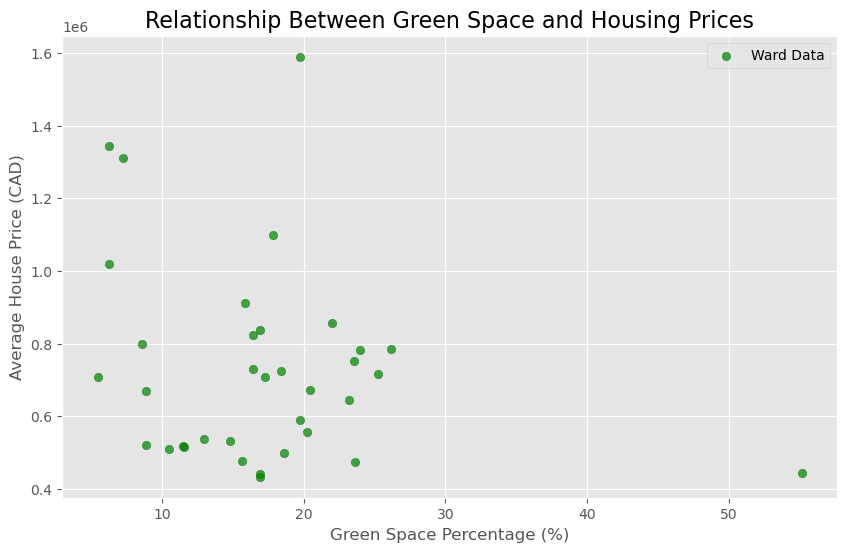

In [53]:
# Scatter plot: green space percentage vs housing prices
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_data["green_space_percentage"],
    merged_data["Composite Benchmark"],
    color="green",
    alpha=0.7,
    label="Ward Data"
)
plt.title("Relationship Between Green Space and Housing Prices", fontsize=16)
plt.xlabel("Green Space Percentage (%)", fontsize=12)
plt.ylabel("Average House Price (CAD)", fontsize=12)
plt.grid(True)
plt.legend()
plt.savefig('plots/green_space_area_vs_prices.png', dpi=300)
plt.show()

In [54]:
correlation = merged_data["green_space_percentage"].corr(merged_data["Composite Benchmark"])
print(f"The correlation between green space percentage and average house price is: {correlation:.2f}")

The correlation between green space percentage and average house price is: -0.23


The above weaker correlation with green space % area suggests we should explore other factors. An important factor could be Points of Interests in the city.

The dataset below is from https://open.toronto.ca/dataset/strollto/

In [55]:
toronto_poi = gpd.read_file("toronto_POI.geojson")
toronto_poi.info()
toronto_poi.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   _id                1843 non-null   int64   
 1   Neighbourhood      1843 non-null   object  
 2   Neighbourhood_Num  1843 non-null   object  
 3   Ward               1843 non-null   object  
 4   Ward_Name          1843 non-null   object  
 5   Order              1843 non-null   object  
 6   Title              1843 non-null   object  
 7   Address            1843 non-null   object  
 8   Description        1843 non-null   object  
 9   Link_URL           1843 non-null   object  
 10  geometry           1843 non-null   geometry
dtypes: geometry(1), int64(1), object(9)
memory usage: 158.5+ KB


,_id,Neighbourhood,Neighbourhood_Num,Ward,Ward_Name,Order,Title,Address,Description,Link_URL,geometry
0,1,Waterfront Communities-The Island,0,10,Spadina-Fort York,A,Toronto Island Ferries & Ward's Island Ferry D...,Ward's Island Ferry Docks,Ferries have been traversing the short route a...,https://www.toronto.ca/explore-enjoy/parks-gar...,MULTIPOINT ((-79.35731 43.63129))
1,2,Waterfront Communities-The Island,0,10,Spadina-Fort York,B,Ward's Island Homes,Area to the north and east of Ward's Island Fe...,"Ward's Island was named after David Ward, a lo...",https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT ((-79.35518 43.63270))
2,3,Waterfront Communities-The Island,0,10,Spadina-Fort York,C,Fire Station 335 & Gordon Peteran 'Fire & Wate...,235 Cibola Avenue,*Please note this is an active fire station. P...,https://www.artworxto.ca/artwork/fire-and-wate...,MULTIPOINT ((-79.35949 43.62537))
3,4,Waterfront Communities-The Island,0,10,Spadina-Fort York,D,St. Andrew by-the-Lake Anglican Church,"On pathway off of Cibola Avenue, across the wa...",This heritage-designated wooden church designe...,,MULTIPOINT ((-79.36983 43.62019))
4,5,Waterfront Communities-The Island,0,10,Spadina-Fort York,E,Centreville Amusement Park & Far Enough Farm,"On Centre Island, southeast of the Centre Isla...","Centreville Amusement Park opened in 1967, fea...",https://www.centreisland.ca/centreville-amusem...,MULTIPOINT ((-79.37367 43.62036))


/tmp/ipykernel_90/4131561885.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")


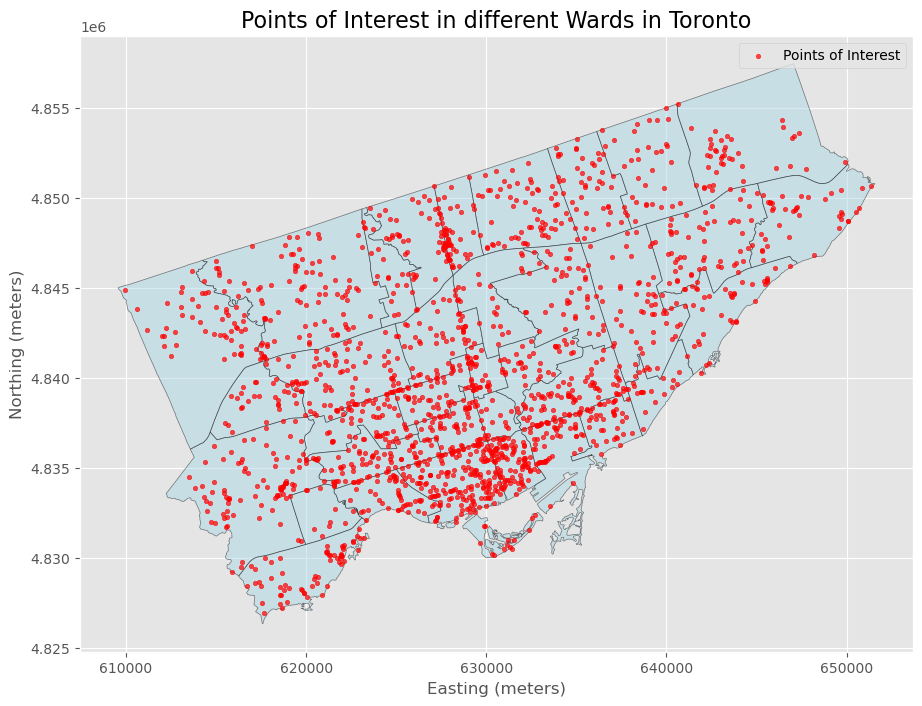

In [56]:
# Reproject the POI dataset to match the CRS of wards_gdf and green_spaces
toronto_poi = toronto_poi.to_crs(wards_gdf.crs)

# Plot the wards, green spaces, and POI
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the wards
wards_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5, label="Wards")

# Plot the Points of Interest
toronto_poi.plot(ax=ax, color="red", alpha=0.7, markersize=10, label="Points of Interest")

# Add labels and title
plt.title("Points of Interest in different Wards in Toronto", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('plots/POI_on_wards.png', dpi=300)

# Show the map
plt.show()

In [57]:
toronto_poi["Ward"].unique()

array(['10', '1', '1|2', '2', '2|3', '3', '7', '5|7', '6|7', '5', '8',
       '6', '18', '6|18', '15|16', '15', '16|19', '16', '17', '15|16|19',
       '11|15', '14', '14|19', '19', '11|13', '13', '10|11', '11', '9|11',
       '9|10|11', '9', '4|10', '4', '4|5', '9|12', '12', '11|12|13',
       '12|15', '8|12', '8|15', '5|9', '22', '21', '20', '20|21', '22|23',
       '23', '25', '24', '24|25', '20|24', '21|24', '23|25', '10|13',
       '10|11|13'], dtype=object)

Calculating POI density since there is no way to group different kinds of points.

In [58]:
# Perform spatial join to assign POIs to wards
poi_with_wards = gpd.sjoin(toronto_poi, wards_gdf, how="left", predicate="within")

# Count the number of POIs in each ward
poi_counts = poi_with_wards.groupby("ward_code").size().reset_index(name="poi_count")

# Merge POI counts with ward data
wards_with_poi = wards_gdf.merge(poi_counts, on="ward_code", how="left")

# Calculate POI density
wards_with_poi["poi_density"] = wards_with_poi["poi_count"] / (wards_with_poi["total_area"] / 1e6)  # per sq km

# Fill missing POI counts with 0 for wards with no POIs
wards_with_poi["poi_count"] = wards_with_poi["poi_count"].fillna(0)
wards_with_poi["poi_density"] = wards_with_poi["poi_density"].fillna(0)

# Display the results
print(wards_with_poi[["ward_code", "poi_count", "total_area", "poi_density"]].head())

     ward_code  poi_count    total_area  poi_density
0  Toronto E09         55  2.524593e+07     2.178569
1  Toronto E05         45  1.725923e+07     2.607301
2  Toronto W03         49  1.158621e+07     4.229164
3  Toronto C15         65  2.467911e+07     2.633807
4  Toronto C03         50  8.418490e+06     5.939307


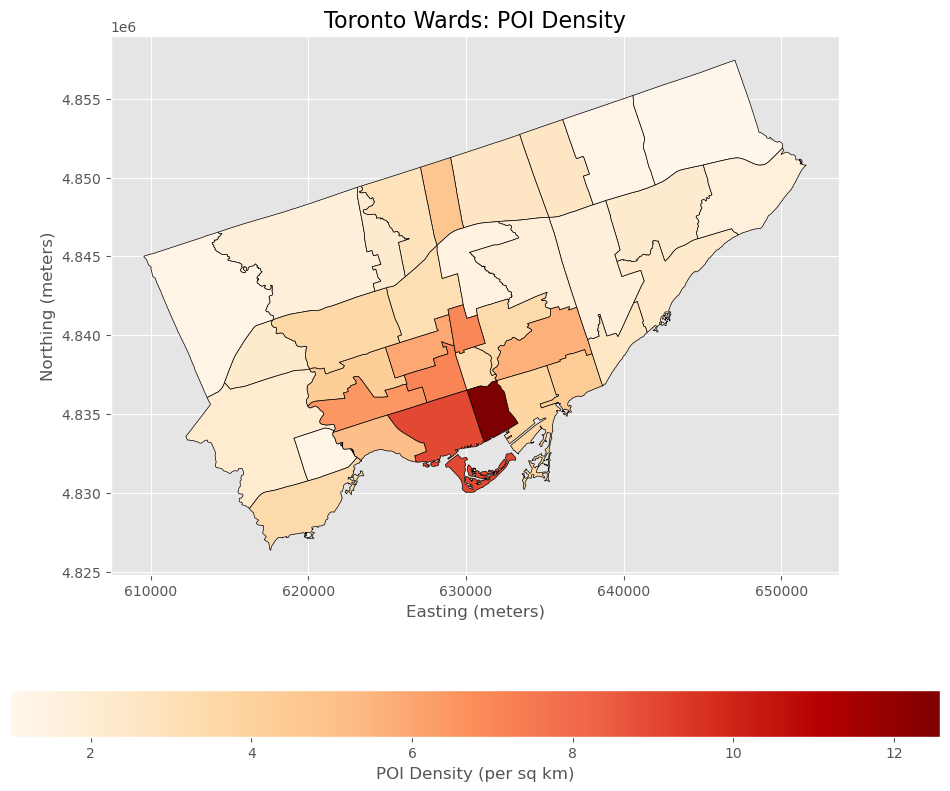

In [59]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(figsize=(12, 10))

# Define a colormap for POI density
cmap = "OrRd"  # Orange-Red color scheme
norm = mcolors.Normalize(vmin=wards_with_poi["poi_density"].min(), vmax=wards_with_poi["poi_density"].max())

# Plot wards with POI density
wards_with_poi.plot(
    column="poi_density",
    cmap=cmap,
    norm=norm,
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "POI Density (per sq km)", "orientation": "horizontal"},
    ax=ax,
)

# Add title and labels
plt.title("Toronto Wards: POI Density", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)

# Add a legend for POIs
plt.savefig('plots/POI_Density_Ward.png', dpi=300)

# Show the plot
plt.grid(True)
plt.show()

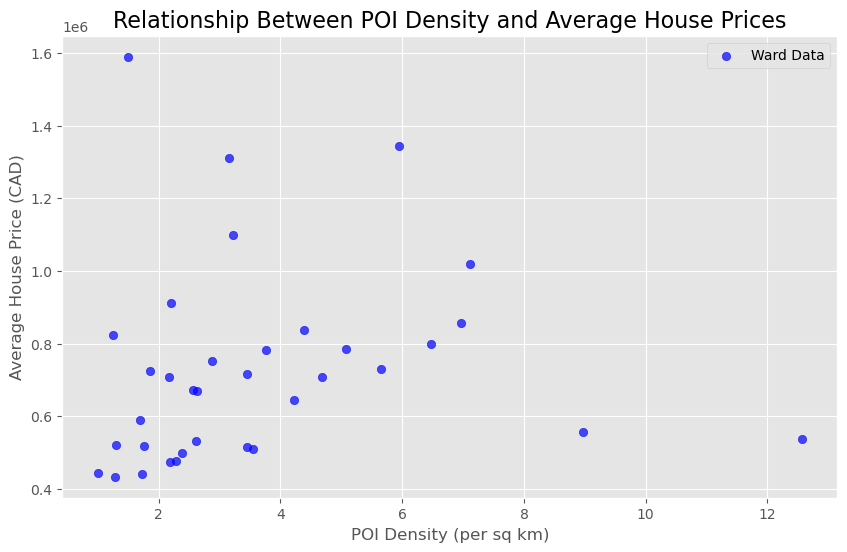

In [60]:
poi_price_data = wards_with_poi.merge(
    merged_data[["ward_code", "Composite Benchmark"]], on="ward_code", how="inner"
)

# Scatter plot of POI density vs. Composite Benchmark
plt.figure(figsize=(10, 6))
plt.scatter(
    poi_price_data["poi_density"],
    poi_price_data["Composite Benchmark"],
    color="blue",
    alpha=0.7,
    label="Ward Data",
)

# Add title and labels
plt.title("Relationship Between POI Density and Average House Prices", fontsize=16)
plt.xlabel("POI Density (per sq km)", fontsize=12)
plt.ylabel("Average House Price (CAD)", fontsize=12)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=10)

# Show plot
plt.show()

In [61]:
correlation = poi_price_data["poi_density"].corr(poi_price_data["Composite Benchmark"])
print(f"The correlation between POI density and average house price is: {correlation:.2f}")

The correlation between POI density and average house price is: 0.10


The above correlation is weak, suggesting we should look at more factors. Let's see if crime rates, in particular shooting and firearm incidents, are a factor for housing prices.

Following dataset from: https://open.toronto.ca/dataset/shootings-firearm-discharges/

In [62]:
# Load the shootings dataset
shootings_data = gpd.read_file("shootings-firearm-discharges.geojson")

# Inspect the dataset
print(shootings_data.info())
print(shootings_data.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6409 entries, 0 to 6408
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   _id                6409 non-null   int64   
 1   EVENT_UNIQUE_ID    6409 non-null   object  
 2   OCC_DATE           6409 non-null   object  
 3   OCC_YEAR           6409 non-null   object  
 4   OCC_MONTH          6409 non-null   object  
 5   OCC_DOW            6409 non-null   object  
 6   OCC_DOY            6409 non-null   object  
 7   OCC_DAY            6409 non-null   object  
 8   OCC_HOUR           6409 non-null   object  
 9   OCC_TIME_RANGE     6409 non-null   object  
 10  DIVISION           6409 non-null   object  
 11  DEATH              6409 non-null   int64   
 12  INJURIES           6409 non-null   int64   
 13  HOOD_158           6409 non-null   object  
 14  NEIGHBOURHOOD_158  6409 non-null   object  
 15  HOOD_140           6409 non-null   object  
 16

/tmp/ipykernel_90/982645468.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")


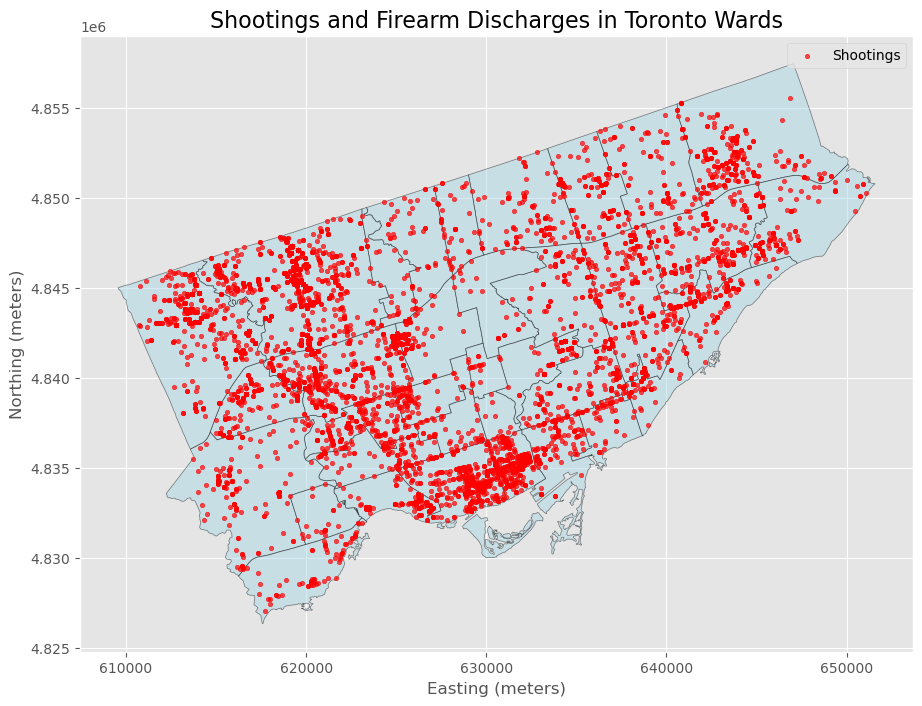

In [63]:
# Reproject shootings dataset to match the CRS of wards_gdf (if not already done)
shootings_data = shootings_data.to_crs(wards_gdf.crs)

# Plot the Toronto wards
fig, ax = plt.subplots(figsize=(12, 8))
wards_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5, label="Wards")

# Plot the shootings data
shootings_data.plot(ax=ax, color="red", markersize=10, alpha=0.7, label="Shootings")

# Add title and labels
plt.title("Shootings and Firearm Discharges in Toronto Wards", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('plots/shootings_wards.png', dpi=300)

# Show the map
plt.show()

In [64]:
# Perform a spatial join to assign wards to shootings
shootings_with_wards = gpd.sjoin(shootings_data, wards_gdf, how="left", predicate="within")

# Display the result to ensure the spatial join worked
shootings_with_wards[["geometry", "ward_code", "DEATH", "INJURIES"]].head()

,geometry,ward_code,DEATH,INJURIES
0,MULTIPOINT ((617720.461 4843339.143)),Toronto W05,0,1
1,MULTIPOINT ((inf inf)),NaN,0,0
2,MULTIPOINT ((629085.454 4834924.969)),Toronto C01,0,2
3,MULTIPOINT ((640447.262 4843685.136)),Toronto E04,0,1
4,MULTIPOINT ((644197.704 4851421.383)),Toronto E11,0,0


Since we must account for both deaths and incidents, let's create a crime score for each data point..

In [65]:
# Assign weights
w1, w2 = 2, 1  # Weights for incidents, deaths, and injuries respectively

# Add a new column for the crime score for each shooting
shootings_with_wards["crime_score"] = (
    (w1 * shootings_with_wards["DEATH"]) + (w2 * shootings_with_wards["INJURIES"])
)

# Display the data to verify
print(shootings_with_wards[["ward_code", "DEATH", "INJURIES", "crime_score"]].head())

     ward_code  DEATH  INJURIES  crime_score
0  Toronto W05      0         1            1
1          NaN      0         0            0
2  Toronto C01      0         2            2
3  Toronto E04      0         1            1
4  Toronto E11      0         0            0


In [66]:
# Group by ward and calculate total metrics
crime_scores_by_ward = shootings_with_wards.groupby("ward_code").agg(
    incident_count=("crime_score", "size"),  # Count of incidents
    total_deaths=("DEATH", "sum"),  # Total deaths in the ward
    total_injuries=("INJURIES", "sum"),  # Total injuries in the ward
    total_crime_score=("crime_score", "sum")  # Total crime score
).reset_index()

# Merge the aggregated data back with the ward GeoDataFrame
wards_with_metrics = wards_gdf.merge(crime_scores_by_ward, on="ward_code", how="left")

# Fill missing values for wards with no incidents
wards_with_metrics.fillna(0, inplace=True)

# Display the updated GeoDataFrame
print(wards_with_metrics[["ward_code", "incident_count", "total_crime_score"]].head())

     ward_code  incident_count  total_crime_score
0  Toronto E09             276                195
1  Toronto E05             149                 91
2  Toronto W03             221                140
3  Toronto C15             126                 85
4  Toronto C03              89                 69


In [67]:
# Calculate crime density per square kilometer
wards_with_metrics["crime_density"] = (
    wards_with_metrics["total_crime_score"] / (wards_with_metrics["total_area"] / 1e6)
)

# Display the updated data
print(wards_with_metrics[["ward_code", "crime_density"]].head())

     ward_code  crime_density
0  Toronto E09       7.724018
1  Toronto E05       5.272543
2  Toronto W03      12.083326
3  Toronto C15       3.444209
4  Toronto C03       8.196244


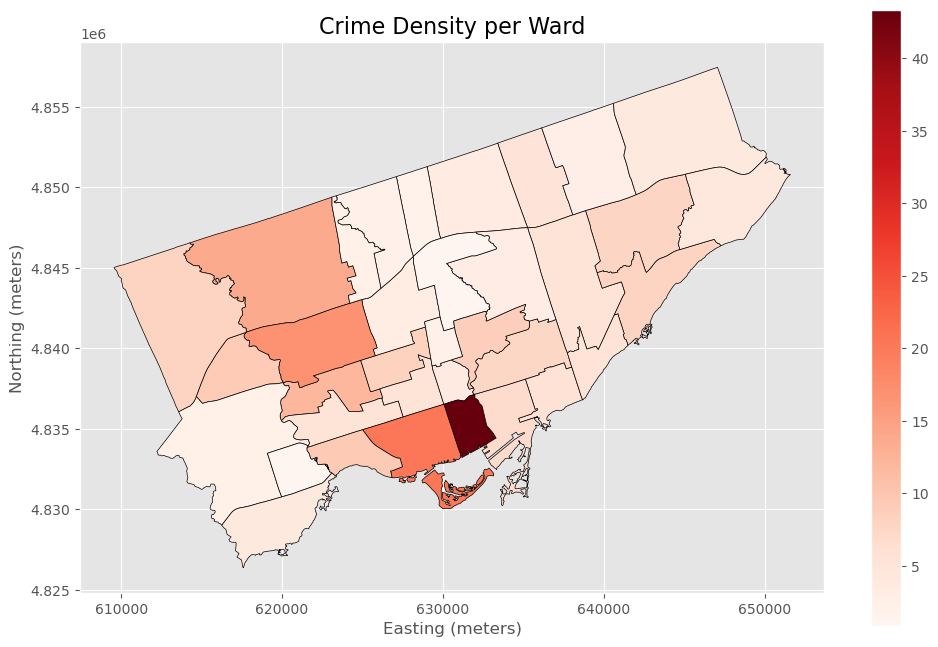

In [69]:
# Plot crime density
fig, ax = plt.subplots(figsize=(12, 8))
wards_with_metrics.plot(
    column="crime_density", 
    cmap="Reds", 
    legend=True, 
    edgecolor="black", 
    ax=ax
)
plt.title("Crime Density per Ward", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.grid(True)
plt.savefig('plots/crime_density_per_ward.png', dpi=300)
plt.show()

In [70]:
# Merge crime density with house prices
crime_price_data = wards_with_metrics.merge(
    merged_data[["ward_code", "Composite Benchmark"]], on="ward_code", how="inner"
)

# Calculate correlation
correlation = crime_price_data["crime_density"].corr(crime_price_data["Composite Benchmark"])
print(f"The correlation between crime density and average house prices is: {correlation:.2f}")

The correlation between crime density and average house prices is: -0.31


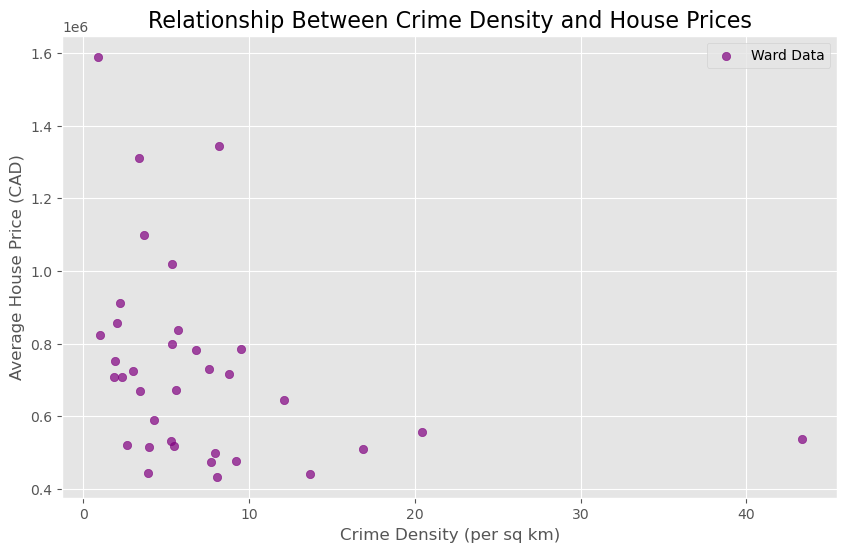

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(
    crime_price_data["crime_density"],
    crime_price_data["Composite Benchmark"],
    color="purple",
    alpha=0.7,
    label="Ward Data"
)

# Add labels and title
plt.title("Relationship Between Crime Density and House Prices", fontsize=16)
plt.xlabel("Crime Density (per sq km)", fontsize=12)
plt.ylabel("Average House Price (CAD)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.savefig('plots/crime_density_vs_house_prices.png', dpi=300)

# Show the plot
plt.show()

It makes sense that the correlation is negative. Since 0.31 still suggests a weaker relationship, lets explore another dataset. Ambulance station locations may be an important factor.

Following dataset from: https://open.toronto.ca/dataset/ambulance-station-locations/

In [72]:
# Load the ambulance station locations dataset
ambulance_data = gpd.read_file("ambulance-station-locations.geojson")

# Inspect the dataset
ambulance_data.info()
ambulance_data.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   _id                          46 non-null     int64   
 1   ADDRESS_POINT_ID             46 non-null     int64   
 2   ADDRESS_NUMBER               46 non-null     object  
 3   LINEAR_NAME_FULL             46 non-null     object  
 4   ADDRESS_FULL                 46 non-null     object  
 5   POSTAL_CODE                  46 non-null     object  
 6   MUNICIPALITY                 46 non-null     object  
 7   CITY                         46 non-null     object  
 8   PLACE_NAME                   46 non-null     object  
 9   GENERAL_USE_CODE             46 non-null     int64   
 10  CENTRELINE_ID                46 non-null     int64   
 11  LO_NUM                       46 non-null     int64   
 12  LO_NUM_SUF                   46 non-null     object  
 13 

,_id,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,...,OBJECTID,EMS_ID,EMS_NAME,EMS_ADDRESS,EMS_NOTES,EMS_WEBSITE,EMS_EXTRA1,EMS_EXTRA2,EMS_ADDITIONAL_ADDRESS_INFO,geometry
0,1,4236992,900,Tapscott Rd,900 Tapscott Rd,M1X 1C3,Scarborough,Toronto,"Fire Station 211, Ambulance Station 27",103005,...,1520443,3055,EMS Stn 27/TFD Stn 211,900 TAPSCOTT RD,None,http://www.toronto.ca/emerg/,None,None,None,MULTIPOINT ((-79.24287 43.82399))
1,2,9313399,5700,Bathurst St,5700 Bathurst St,M2R 3N4,North York,Toronto,"Fire Station 112, Ambulance Station 5",103005,...,1569078,3024,EMS Stn 55/EMS 5 DISTRICT OFFICE/TFD Stn 112,5700 BATHURST ST,None,http://www.toronto.ca/emerg/,None,None,None,MULTIPOINT ((-79.44429 43.77629))
2,3,5336734,4330,Dufferin St,4330 Dufferin St,M3H 5R9,North York,Toronto,"Headquarters-Fire Services, Ambulance Station 16",103005,...,1584186,3180,EMS Headquarters/EMS 53 Stn/Fire Headquarters,4330 Dufferin St,None,http://www.toronto.ca/emerg,None,None,None,MULTIPOINT ((-79.46653 43.76179))
3,4,13498086,12,Canterbury Pl,12 Canterbury Pl,M2N 6N8,North York,Toronto,"Fire Station 114, Ambulance Station 22",103005,...,1752247,3090,EMS Stn 58/TFD Stn 114,12 CANTERBURY PL,None,http://www.toronto.ca/emerg/,None,None,None,MULTIPOINT ((-79.41535 43.77264))
4,5,9011645,3100,Eglinton Ave E,3100 Eglinton Ave E,M1J 2H1,Scarborough,Toronto,Ambulance Station 49,103001,...,1769866,3133,EMS Stn 22,3100 EGLINTON AVE E,None,None,None,None,None,MULTIPOINT ((-79.22626 43.74200))


/tmp/ipykernel_90/1249783207.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")


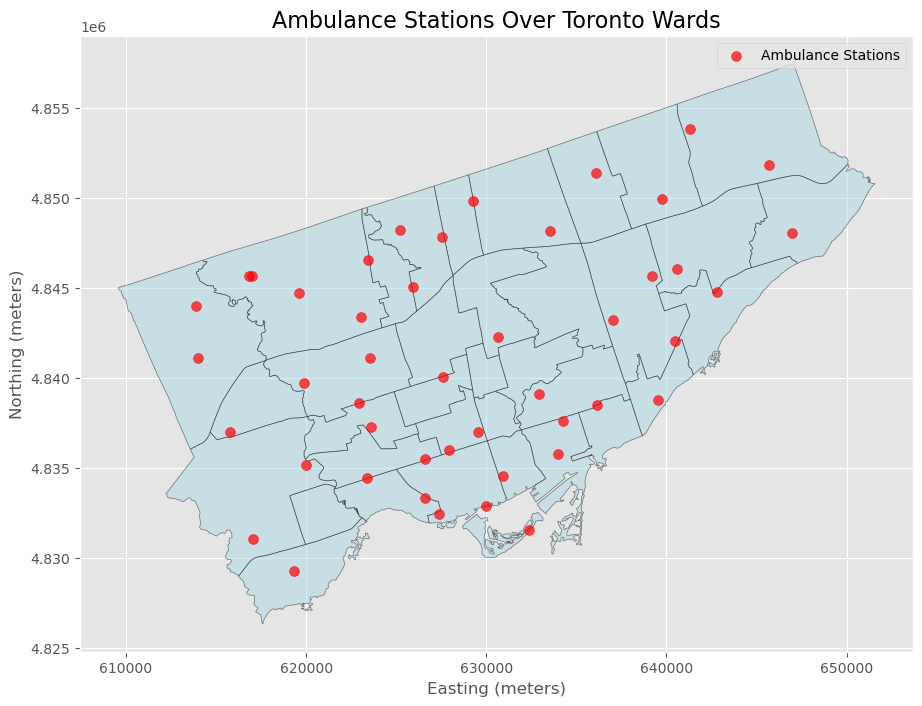

In [73]:
# Reproject ambulance data to match the CRS of wards_gdf
ambulance_data = ambulance_data.to_crs(wards_gdf.crs)

# Plot the Toronto wards with ambulance station locations
fig, ax = plt.subplots(figsize=(12, 8))

# Plot wards
wards_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5, label="Wards")

# Plot ambulance station locations
ambulance_data.plot(ax=ax, color="red", markersize=50, alpha=0.7, label="Ambulance Stations")

# Add title, labels, and legend
plt.title("Ambulance Stations Over Toronto Wards", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('plots/ambulance_stations_over_Toronto.png', dpi=300)

# Show the plot
plt.show()

In [74]:
# Perform spatial join to assign ambulance stations to wards
ambulance_with_wards = gpd.sjoin(ambulance_data, wards_gdf, how="left", predicate="within")

# Count ambulance stations per ward
ambulance_counts = ambulance_with_wards.groupby("ward_code").size().reset_index(name="ambulance_count")

In [75]:
# Merge the counts with ward data
wards_with_ambulance = wards_gdf.merge(ambulance_counts, on="ward_code", how="left")

# Calculate density (per sq km)
wards_with_ambulance["ambulance_density"] = wards_with_ambulance["ambulance_count"] / (wards_with_ambulance["total_area"] / 1e6)

# Fill NaN values with 0 for wards with no ambulance stations
wards_with_ambulance["ambulance_density"] = wards_with_ambulance["ambulance_density"].fillna(0)

In [76]:
# Merge with house prices
ambulance_price_data = wards_with_ambulance.merge(
    merged_data[["ward_code", "Composite Benchmark"]], on="ward_code", how="inner"
)

The correlation between ambulance station density and house prices is: -0.04


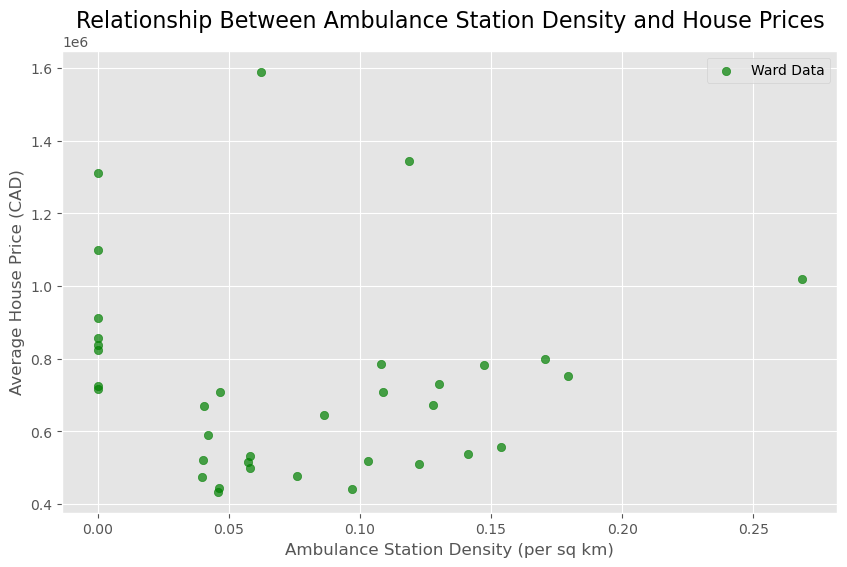

In [77]:
# Calculate correlation
correlation = ambulance_price_data["ambulance_density"].corr(ambulance_price_data["Composite Benchmark"])
print(f"The correlation between ambulance station density and house prices is: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    ambulance_price_data["ambulance_density"],
    ambulance_price_data["Composite Benchmark"],
    color="green",
    alpha=0.7,
    label="Ward Data"
)
plt.title("Relationship Between Ambulance Station Density and House Prices", fontsize=16)
plt.xlabel("Ambulance Station Density (per sq km)", fontsize=12)
plt.ylabel("Average House Price (CAD)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.savefig('plots/ambulance_station_density_vs_house_prices.png', dpi=300)
plt.show()

Let's look at neighbourhood improvement areas. This dataset is taken from: https://open.toronto.ca/dataset/neighbourhood-improvement-areas/

In [78]:
# Load the Neighbourhood Improvement Areas dataset
improvement_areas = gpd.read_file("Neighbourhood Improvement Areas.geojson")

# Inspect the dataset
improvement_areas.info()
improvement_areas.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _id                33 non-null     int64         
 1   AREA_ID            33 non-null     float64       
 2   DATE_EFFECTIVE     33 non-null     datetime64[ns]
 3   DATE_EXPIRY        33 non-null     object        
 4   AREA_ATTR_ID       33 non-null     float64       
 5   AREA_TYPE_ID       33 non-null     float64       
 6   PARENT_AREA_ID     33 non-null     float64       
 7   AREA_TYPE          33 non-null     object        
 8   AREA_CLASS_ID      33 non-null     float64       
 9   AREA_CLASS         33 non-null     object        
 10  AREA_SHORT_CODE    33 non-null     object        
 11  AREA_LONG_CODE     33 non-null     object        
 12  AREA_NAME          33 non-null     object        
 13  AREA_DESC          33 non-null     object        
 14  FEAT

/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:391: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  as_dt = pd.to_datetime(df[k])
/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:398: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  as_dt = pd.to_datetime(df[k], utc=True)


,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,OBJECTID,geometry
0,1,2502359.0,2022-04-11 21:27:23,3000-01-01T05:00:00,26022874.0,602.0,0.0,CNBH,0.0,None,155,155,Downsview,Downsview (155),0,None,344709.0,-1.0,17824849,"MULTIPOLYGON (((-79.46453 43.75014, -79.46430 ..."
1,2,2502358.0,2022-04-11 21:27:23,3000-01-01T05:00:00,26022873.0,602.0,0.0,CNBH,0.0,None,154,154,Oakdale-Beverley Heights,Oakdale-Beverley Heights (154),0,None,344709.0,-1.0,17824865,"MULTIPOLYGON (((-79.51192 43.73457, -79.51154 ..."
2,3,2502346.0,2022-04-11 21:27:23,3000-01-01T05:00:00,26022861.0,602.0,0.0,CNBH,0.0,None,142,142,Woburn North,Woburn North (142),0,None,344709.0,-1.0,17825057,"MULTIPOLYGON (((-79.22448 43.78841, -79.22430 ..."
3,4,2502345.0,2022-04-11 21:27:23,3000-01-01T05:00:00,26022860.0,602.0,0.0,CNBH,0.0,None,141,141,Golfdale-Cedarbrae-Woburn,Golfdale-Cedarbrae-Woburn (141),0,None,344709.0,-1.0,17825073,"MULTIPOLYGON (((-79.21948 43.77179, -79.21868 ..."
4,5,2502343.0,2022-04-11 21:27:23,3000-01-01T05:00:00,26022858.0,602.0,0.0,CNBH,0.0,None,139,139,Scarborough Village,Scarborough Village (139),0,None,344709.0,-1.0,17825105,"MULTIPOLYGON (((-79.20827 43.73757, -79.20761 ..."


/tmp/ipykernel_90/3165006272.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(fontsize=10, loc="upper right")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


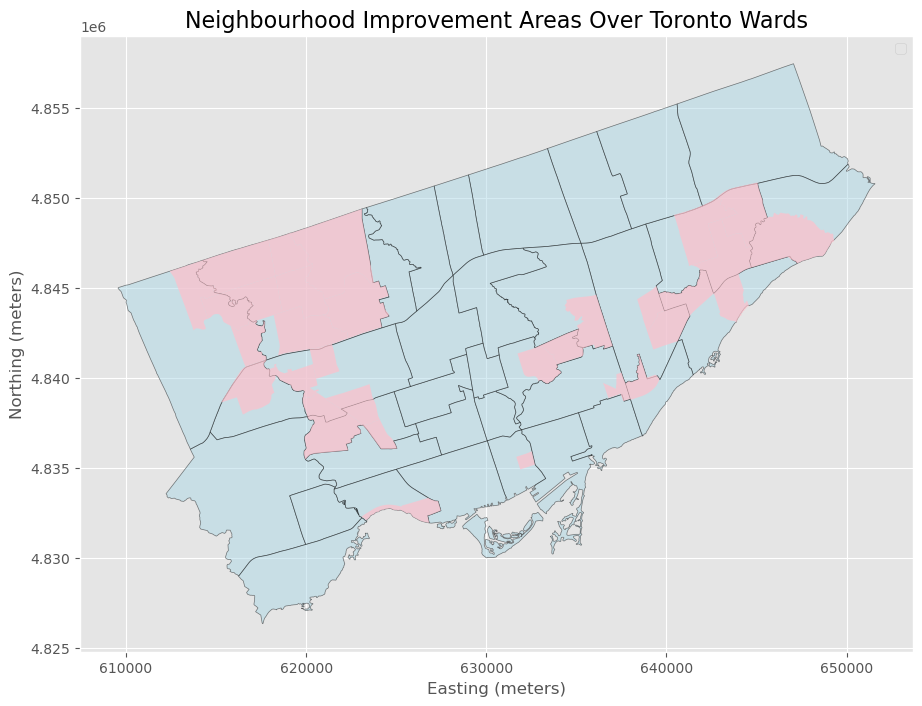

In [79]:
# Reproject improvement areas to match the CRS of wards_gdf
improvement_areas = improvement_areas.to_crs(wards_gdf.crs)

# Plot wards with improvement areas
fig, ax = plt.subplots(figsize=(12, 8))
wards_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5, label="Wards")
improvement_areas.plot(ax=ax, color="pink", alpha=0.7, label="Improvement Areas")
plt.title("Neighbourhood Improvement Areas Over Toronto Wards", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.legend(fontsize=10, loc="upper right")
plt.grid(True)
plt.savefig('plots/NAI_wards.png', dpi=300)
plt.show()

We can see that neighbourhood improvement areas is not that widespread across the city.

In [80]:
# Perform spatial join to assign improvement areas to wards
wards_with_improvement = gpd.sjoin(wards_gdf, improvement_areas, how="left", predicate="intersects")

# Count the number of improvement areas per ward
improvement_counts = wards_with_improvement.groupby("ward_code").size().reset_index(name="improvement_count")

In [81]:
# Merge improvement counts with ward-level house prices
wards_with_improvement = improvement_counts.merge(merged_data, on="ward_code", how="left")

# Calculate the correlation between improvement areas and house prices
correlation = wards_with_improvement["improvement_count"].corr(wards_with_improvement["Composite Benchmark"])
print(f"The correlation between improvement areas and average house prices is: {correlation:.2f}")

The correlation between improvement areas and average house prices is: -0.45


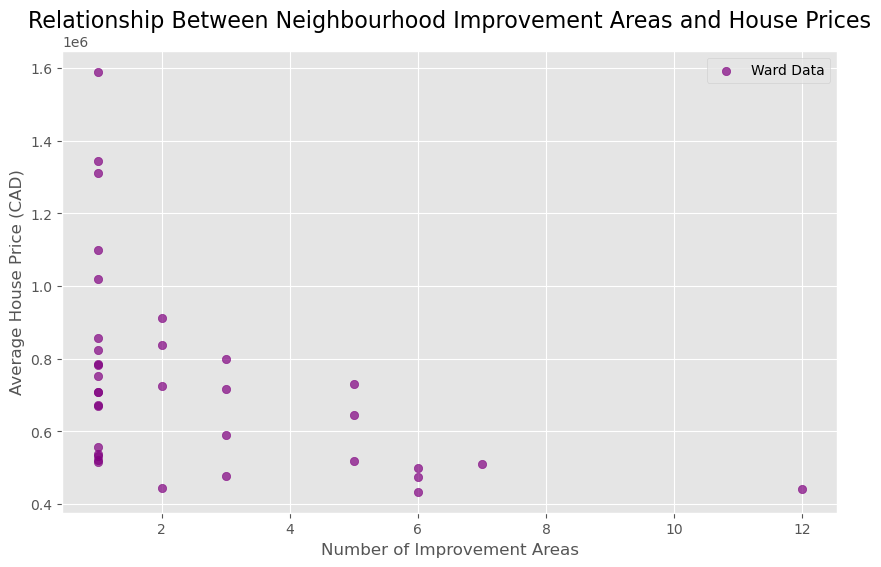

In [82]:
# Scatter plot of improvement areas vs. house prices
plt.figure(figsize=(10, 6))
plt.scatter(
    wards_with_improvement["improvement_count"],
    wards_with_improvement["Composite Benchmark"],
    color="purple",
    alpha=0.7,
    label="Ward Data"
)
plt.title("Relationship Between Neighbourhood Improvement Areas and House Prices", fontsize=16)
plt.xlabel("Number of Improvement Areas", fontsize=12)
plt.ylabel("Average House Price (CAD)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.savefig('plots/NAI_vs_house_prices.png', dpi=300)
plt.show()

Let's see if proximity to schools is a factor for housing prices. The following dataset is taken from https://open.toronto.ca/dataset/tcdsb-schools/

In [83]:
# Step 1: Load the school dataset
school_data = gpd.read_file("schools.geojson")

# Step 2: Inspect the dataset
school_data.info()  # Get an overview of the columns and data types
school_data.head()  # Preview the first few rows of the dataset

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   _id           210 non-null    int64   
 1   OBJECTID      210 non-null    int64   
 2   TCDSB_CODE    210 non-null    object  
 3   SCH_NAME      210 non-null    object  
 4   ADDRESS_FULL  210 non-null    object  
 5   MUNICIPALITY  210 non-null    object  
 6   POSTAL_CODE   210 non-null    object  
 7   TCDSB_LEVEL   210 non-null    object  
 8   STATUS        210 non-null    object  
 9   geometry      210 non-null    geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 16.5+ KB


,_id,OBJECTID,TCDSB_CODE,SCH_NAME,ADDRESS_FULL,MUNICIPALITY,POSTAL_CODE,TCDSB_LEVEL,STATUS,geometry
0,1,1,299,Annunciation,65 Avonwick Gt,North York,M3A 2M8,E,Open,MULTIPOINT ((-79.32127 43.75335))
1,2,2,290,All Saints,1435 Royal York Rd,Etobicoke,M9P 3A7,E,Open,MULTIPOINT ((-79.52716 43.68562))
2,3,3,222,St. Martin Program,55 Salisbury Ave,former Toronto,M4X 1C5,AL,Open,MULTIPOINT ((-79.36443 43.66717))
3,4,4,545,Bishop Marrocco-Thomas Merton,1515 Bloor St W,former Toronto,M6P 1A3,S,Open,MULTIPOINT ((-79.45181 43.65586))
4,5,5,549,Bishop Allen Academy,721 Royal York Rd,Etobicoke,M8Y 2T3,S,Open,MULTIPOINT ((-79.50446 43.63443))


/tmp/ipykernel_90/574227542.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right")


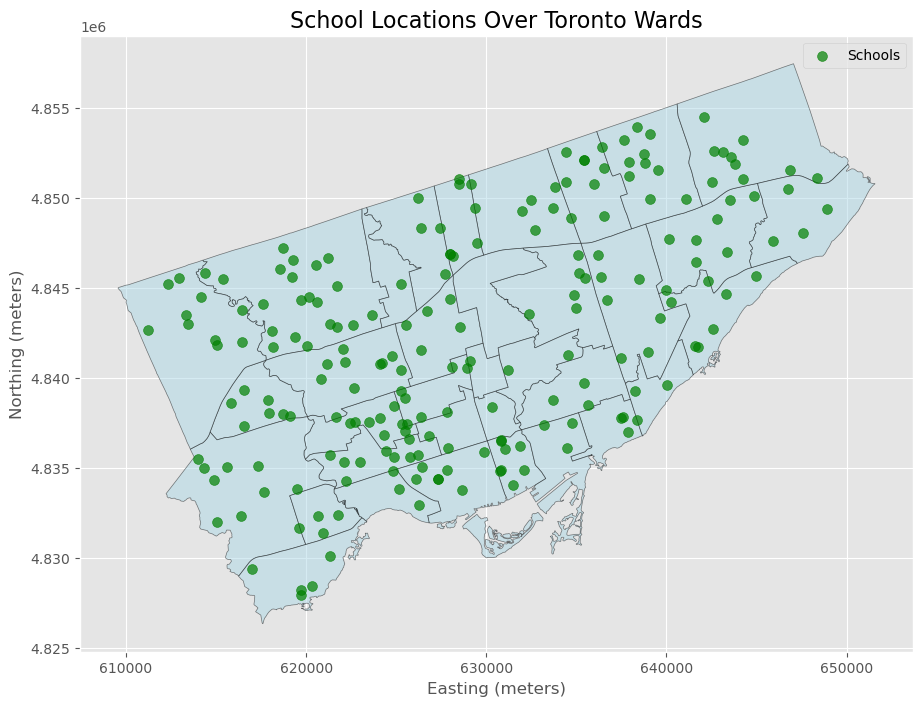

In [84]:
# Reproject school data to match the CRS of wards_gdf (if necessary)
school_data = school_data.to_crs(wards_gdf.crs)

# Plot schools over Toronto wards
fig, ax = plt.subplots(figsize=(12, 8))

# Plot wards
wards_gdf.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5, label="Wards")

# Plot schools
school_data.plot(ax=ax, color="green", markersize=50, alpha=0.7, label="Schools")

# Add title, labels, and legend
plt.title("School Locations Over Toronto Wards", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig('plots/schools_wards.png', dpi=300)

# Show the plot
plt.show()

In [85]:
# Step 1: Perform spatial join to assign schools to wards
schools_with_wards = gpd.sjoin(school_data, wards_gdf, how="left", predicate="within")

# Step 2: Count the number of schools in each ward
school_counts = schools_with_wards.groupby("ward_code").size().reset_index(name="school_count")

# Step 3: Merge school counts with ward data
wards_with_schools = wards_gdf.merge(school_counts, on="ward_code", how="left")
wards_with_schools["school_count"] = wards_with_schools["school_count"].fillna(0)

# Step 4: Calculate school density (schools per sq km)
wards_with_schools["school_density"] = (
    wards_with_schools["school_count"] / (wards_with_schools["total_area"] / 1e6)
)

# Step 5: Merge with house price data
school_price_data = wards_with_schools.merge(
    merged_data[["ward_code", "Composite Benchmark"]],
    on="ward_code",
    how="inner",
)

In [86]:
# Step 6: Calculate correlation
correlation = school_price_data["school_density"].corr(school_price_data["Composite Benchmark"])
print(f"The correlation between school density and average house prices is: {correlation:.2f}")

The correlation between school density and average house prices is: -0.15


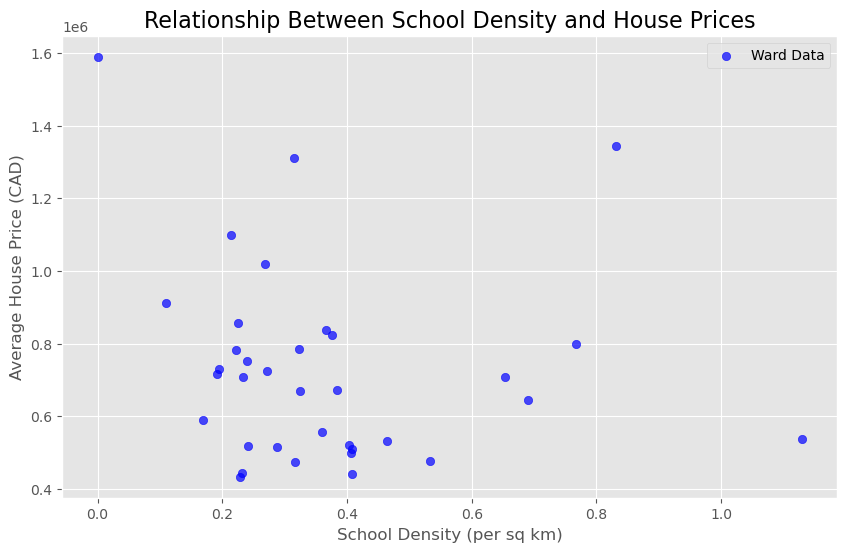

In [87]:
# Step 7: Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    school_price_data["school_density"],
    school_price_data["Composite Benchmark"],
    color="blue",
    alpha=0.7,
    label="Ward Data",
)
plt.title("Relationship Between School Density and House Prices", fontsize=16)
plt.xlabel("School Density (per sq km)", fontsize=12)
plt.ylabel("Average House Price (CAD)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.savefig('plots/School_Density_vs_house_prices.png', dpi=300)
plt.show()